# ................................. POLLSTER RATING PREDICTION .................................

<div class="alert alert-block alert-info">
<b>Importing Dependencies</b> </div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">
<b>Load the dataset</b> </div>

In [2]:
df = pd.read_excel('POLLSTER RATINGS.xlsx')
df.columns

Index(['Pollster', '# of Polls', 'NCPP / AAPOR / Roper',
       'Exclusively Live Caller With Cellphones', 'Methodology',
       'Banned by 538', 'Predictive    Plus-Minus', '538 Grade',
       'Mean-Reverted Bias', 'Races Called Correctly', 'Misses Outside MOE',
       'Simple Average Error', 'Simple Expected Error', 'Simple Plus-Minus',
       'Advanced Plus-Minus', 'Mean-Reverted Advanced Plus Minus',
       'Predictive Plus-Minus', '# of Polls for Bias Analysis', 'Bias',
       'House Effect', 'Year'],
      dtype='object')

<div class="alert alert-block alert-info">
<b>To display shape of dataset</b> </div>

In [3]:
df.shape

(1105, 21)

<div class="alert alert-block alert-info">
<b>To display columns,datatype, Null values </b> </div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Pollster                                 1105 non-null   object 
 1   # of Polls                               1105 non-null   int64  
 2   NCPP / AAPOR / Roper                     1105 non-null   object 
 3   Exclusively Live Caller With Cellphones  1105 non-null   object 
 4   Methodology                              1105 non-null   object 
 5   Banned by 538                            1105 non-null   object 
 6   Predictive    Plus-Minus                 1105 non-null   float64
 7   538 Grade                                1105 non-null   object 
 8   Mean-Reverted Bias                       1105 non-null   object 
 9   Races Called Correctly                   1105 non-null   object 
 10  Misses Outside MOE                       1105 no


<div class="alert alert-block alert-success">
<b>No null values in this dataset</b> </div>

<div class="alert alert-block alert-info">
<b>To display first five rows</b> </div>

In [5]:
df.head()

,Pollster,# of Polls,NCPP / AAPOR / Roper,Exclusively Live Caller With Cellphones,Methodology,Banned by 538,Predictive Plus-Minus,538 Grade,Mean-Reverted Bias,Races Called Correctly,...,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus Minus,Predictive Plus-Minus,# of Polls for Bias Analysis,Bias,House Effect,Year
0,Selzer & Co.,43,yes,yes,Live,no,-1.357517,A+,-0.00366667,0.86,...,4.2,5.6,-1.4,-1.9,-1.1,-1.4,30,-0.00733333,0.149412,2020
1,Monmouth University,95,yes,yes,Live,no,-1.287058,A+,1.42589,0.8,...,5.3,6.2,-0.8,-1.5,-1.1,-1.3,65,2.084,-0.697921,2020
2,Field Research Corp. (Field Poll),25,yes,yes,Live,no,-1.142149,A+,-1.21896,1,...,3.9,5.7,-1.8,-2.5,-1.1,-1.1,18,-3.25056,0.614626,2020
3,ABC News/Washington Post,60,yes,yes,Live,no,-1.073369,A+,0.613412,0.78,...,2.9,4.6,-1.8,-1.3,-0.9,-1.1,55,0.948,1.48025,2020
4,Elway Research,21,yes,yes,Live,no,-1.056747,A+,0.4736,0.9,...,3.9,5.9,-1.9,-2.2,-0.9,-1.1,20,1.184,3.24362,2020


In [6]:
df.replace('None',np.nan,inplace = True)

In [7]:
df.isnull().sum()

Pollster                                     0
# of Polls                                   0
NCPP / AAPOR / Roper                       283
Exclusively Live Caller With Cellphones    205
Methodology                                337
Banned by 538                              333
Predictive    Plus-Minus                     0
538 Grade                                    0
Mean-Reverted Bias                         102
Races Called Correctly                     337
Misses Outside MOE                         709
Simple Average Error                         0
Simple Expected Error                      709
Simple Plus-Minus                          372
Advanced Plus-Minus                          0
Mean-Reverted Advanced Plus Minus          709
Predictive Plus-Minus                      709
# of Polls for Bias Analysis               337
Bias                                       741
House Effect                               762
Year                                         0
dtype: int64

<div class="alert alert-block alert-info">
<b>
EMPTY CELL NUMERIC DATA TYPE VARIABLES
</b>

Mean-Reverted Bias has 102 null values, replacing with the 0

Races Called Correctly  has 337 null values, replacing with the 0

Misses Outside MOE  has 709 null values, replacing with the 0

Simple Expected Error  has 709 null values, replacing with the 0

Simple Plus-Minus  has 372 null values, replacing with the 0

Mean-Reverted Advanced Plus Minus  has 709 null values, replacing with the 0

Predictive Plus-Minus  has 709 null values, replacing with the 0

No of Polls for Bias Analysis  has 337 null values, replacing with the 0

Bias  has 741 null values, replacing with the 0

House Effect  has 762 null values, replacing with the 0

</div>

In [8]:
df['Mean-Reverted Bias']=df['Mean-Reverted Bias'].fillna(value='0')
df['Races Called Correctly']=df['Races Called Correctly'].fillna(value='0')
df['Misses Outside MOE']=df['Misses Outside MOE'].fillna(value='0')
df['Simple Expected Error']=df['Simple Expected Error'].fillna(value='0')
df['Simple Plus-Minus']=df['Simple Plus-Minus'].fillna(value='0')
df['Mean-Reverted Advanced Plus Minus']=df['Races Called Correctly'].fillna(value='0')
df['Predictive Plus-Minus']=df['Predictive Plus-Minus'].fillna(value='0')
df['# of Polls for Bias Analysis']=df['# of Polls for Bias Analysis'].fillna(value='0')
df['Bias']=df['Bias'].fillna(value='0')
df['House Effect']=df['House Effect'].fillna(value='0')

<div class="alert alert-block alert-info">
<b>
EMPTY CELL CATEGORICAL DATA TYPE VARIABLES
</b>

NCPP / AAPOR / Roper has 283 null values. Data is  like 'Yes' or 'No'. empty cells replacing with the Neutral.

Exclusively Live Caller With Cellphones has 205 null values. Data is  like 'Yes'nor 'No'. empty cells replacing with the Neutral.

Methodology has 337 null values. Data is like 'Live', 'IVR/Online/Live', 'Online', 'IVR', 'Live*', 'IVR/Online','Online/Live', 'IVR/Live', 'Online/Live/Mail', 'Mail', 'no', 'yes'. 
empty cell replacing with the Neutral

Banned by 538 has 333 null values. Data is like 'Yes' or 'No'. empty cells replacing with the Neutral

</div>

In [9]:
df['NCPP / AAPOR / Roper'] = df['NCPP / AAPOR / Roper'].fillna(value='Neutral')
df['Exclusively Live Caller With Cellphones'] = df['Exclusively Live Caller With Cellphones'].fillna(value='Neutral')
df['Methodology'] = df['Methodology'].fillna(value='Neutral')
df['Banned by 538'] = df['Banned by 538'].fillna(value='Neutral')

<div class="alert alert-block alert-info">
<b>To find unique values</b> </div>

In [10]:
df['Methodology'].unique()

array(['Live', 'IVR/Online/Live', 'Online', 'IVR', 'Live*', 'IVR/Online',
       'Online/Live', 'IVR/Live', 'Online/Live/Mail', 'Mail', 'no', 'yes',
       'Neutral'], dtype=object)

<div class="alert alert-block alert-info">
<b>LABEL ENCODING  -->  </b>    Converting Categorical variables to numerical</div>

In [11]:
columns=['Pollster','NCPP / AAPOR / Roper','Exclusively Live Caller With Cellphones','Methodology','Banned by 538','538 Grade']
       
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in columns:
    df[i]=le.fit_transform(df[i])

In [12]:
df.tail(10)

,Pollster,# of Polls,NCPP / AAPOR / Roper,Exclusively Live Caller With Cellphones,Methodology,Banned by 538,Predictive Plus-Minus,538 Grade,Mean-Reverted Bias,Races Called Correctly,...,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus Minus,Predictive Plus-Minus,# of Polls for Bias Analysis,Bias,House Effect,Year
1095,440,8,0,1,7,0,1.421870,9,-1.73328,0,...,8.22370,0,3.86704,4.629449,0,0,0,0,0,2014
1096,268,6,0,0,7,0,1.447369,9,1.41863,0,...,8.50772,0,3.94352,4.614092,0,0,0,0,0,2014
1097,333,1,0,0,7,0,1.527722,9,1.0871,0,...,33.70000,0,28.4054,24.838680,0,0,0,0,0,2014
1098,430,6,0,0,7,0,1.534950,9,0.400483,0,...,11.48380,0,6.96825,5.139575,0,0,0,0,0,2014
1099,78,2,0,0,7,0,1.537619,9,-1.32526,0,...,21.20410,0,16.6174,13.151540,0,0,0,0,0,2014
1100,245,5,0,0,7,0,1.553966,11,-1.49457,0,...,14.06200,0,8.87764,6.069618,0,0,0,0,0,2014
1101,234,2,0,0,7,0,1.656743,11,-1.49375,0,...,23.90000,0,17.5788,15.057520,0,0,0,0,0,2014
1102,163,10,2,0,7,0,1.897668,11,0.798112,0,...,13.06640,0,7.42463,6.714734,0,0,0,0,0,2014
1103,462,86,0,0,7,0,2.502591,12,-1.44392,0,...,6.51235,0,1.884,2.738137,0,0,0,0,0,2014
1104,377,133,0,0,7,2,2.894006,12,-4.50972,0,...,6.44887,0,2.09732,3.000317,0,0,0,0,0,2014


<div class="alert alert-block alert-info">
<b>To find Corrilation between the variables  -->  </b> </div>

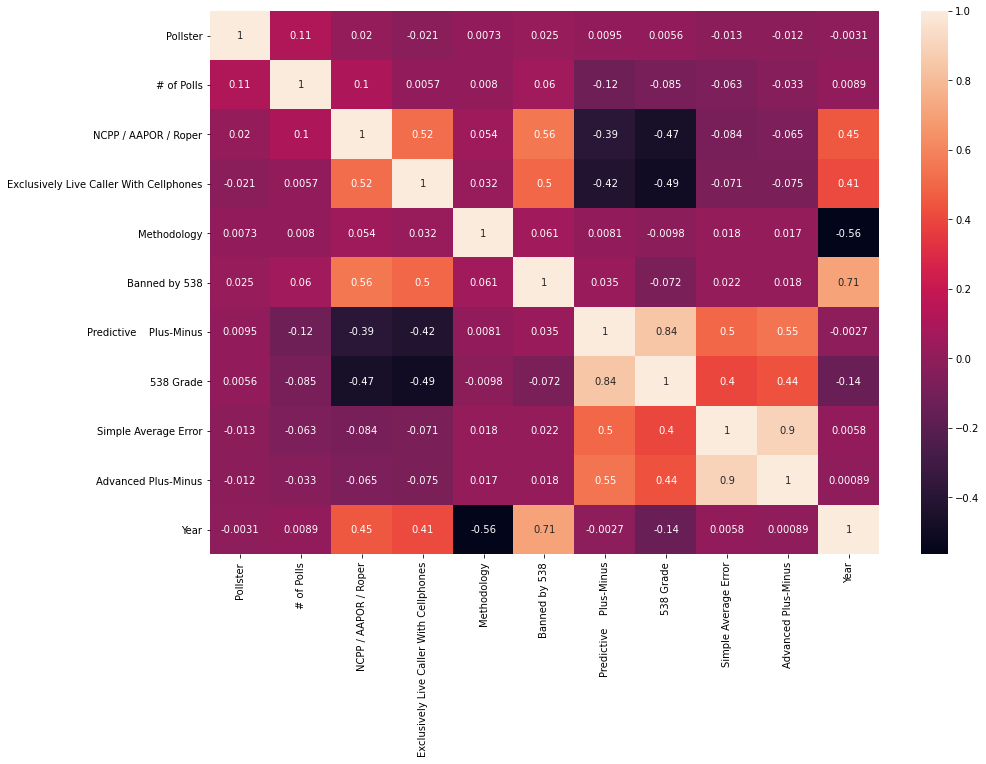

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

<div class="alert alert-block alert-info">
<b>Seperating Data as INDEPENDENT & DEPENDENT columns</b> </div>

In [14]:
x = df.loc[:, ['Pollster', '# of Polls', 'NCPP / AAPOR / Roper',
       'Exclusively Live Caller With Cellphones', 'Methodology',
       'Banned by 538', '538 Grade',
       'Mean-Reverted Bias', 'Races Called Correctly', 'Misses Outside MOE',
       'Simple Average Error', 'Simple Expected Error', 'Simple Plus-Minus',
       'Advanced Plus-Minus', 'Mean-Reverted Advanced Plus Minus',
       '# of Polls for Bias Analysis', 'Bias',
       'House Effect', 'Year']]

Y = df['Predictive    Plus-Minus']

<div class="alert alert-block alert-success">
<b>TARGET VARIABLE  -->  </b> Here our target variable is 'Predictive Plus-Minus' </div>


<div class="alert alert-block alert-info">
<b>Standardizing the data</b> </div>

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

<div class="alert alert-block alert-info">
<b>Splitting the data for training and testing</b> </div>

In [16]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

<div class="alert alert-block alert-success">
<b>Here we gave 70% of data for training</b> </div>


<div class="alert alert-block alert-info">
<b>To check Training & Testing shape</b> </div>

In [17]:
print("Training shape",x_train.shape)
print("Testing shape",x_test.shape)

Training shape (773, 19)
Testing shape (332, 19)


<div class="alert alert-block alert-danger">
<b>.......................................................................................... X G BOOST REGREGRESSOR ........................................................................................</b> </div>


<div class="alert alert-block alert-info">
<b>STEP 1.      Import XGBoost</b> </div>



In [18]:
import xgboost

<div class="alert alert-block alert-info">
<b>STEP 2.        Importing model XGBoost Regressor</b> </div>



In [19]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

<div class="alert alert-block alert-info">
<b>STEP 3.Training model</b> </div>



In [20]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<div class="alert alert-block alert-info">
<b>STEP 4.   import r2_score</b> </div>



In [21]:
from sklearn.metrics import r2_score

<div class="alert alert-block alert-info">
<b>STEP  5. Prediction  /  Testing  /  Evaluation</b> </div>



In [24]:
print("training accuracy:",r2_score(y_train,xgb_model.predict(x_train)))
print("testing accuracy:",r2_score(y_test,xgb_model.predict(x_test)))

training accuracy: 0.9999665516974952
testing accuracy: 0.974872725898762


<div class="alert alert-block alert-success">
<b>

Training Accuracy:-----> 99%
    
Testing Accuracy:-----> 97%
    
So we got Modarate Best Result from XGBoostRegressor Machine Learning Model.

</b> </div>


<div class="alert alert-block alert-info">
<b>Checking with remaining  Machine Learning Models.</b> </div>

<div class="alert alert-block alert-success">
<b>

LinearRegression:-

Training Accuracy:-----> 81%

Testing Accuracy:-----> 80%
    
</b> 

Here we got less Training & Testing Accuracy

</div>

<div class="alert alert-block alert-success">
<b>

DecisionTreeRegressor:-

Training Accuracy:-----> 100%

Testing Accuracy:-----> 95%
    
</b> 

Here we got Overfitting result from Training & Testing Accuracy of DecisionTreeRegressor Machine Learning Model.

</div>

<div class="alert alert-block alert-success">
<b>

RandomForestRegressor:-

Training Accuracy:-----> 99%

Testing Accuracy:-----> 97%
    
</b> 

Here aslo we got good modarate result from Training & Testing Accuracy of RandomForestRegressor Machine Learning Model.

</div>

<div class="alert alert-block alert-success">
<b>

SupportVectorRegressor:-

Training Accuracy:-----> 93%

Testing Accuracy:-----> 86%
    
</b> 

Here we got Overfitting result from Training & Testing Accuracy of SupportVectorRegressor Machine Learning Model.

</div>


<div class="alert alert-block alert-success">
<b>

KNeighborsRegressor:-

Training Accuracy:-----> 84%

Testing Accuracy:-----> 75%
    
</b> 

Here we got less & Overfitting result from Training & Testing Accuracy of KNeighborsRegressor Machine Learning Model.

</div>

<div class="alert alert-block alert-success">
<b>

AdaBoostRegressor:-

Training Accuracy:-----> 91%

Testing Accuracy:-----> 89%
    
</b> 

Here we got Overfitting result from Training & Testing Accuracy of AdaBoostRegressor Machine Learning Model.

</div>


<div class="alert alert-block alert-success">
<b>

GradientBoostingRegressor:-

Training Accuracy:-----> 99%

Testing Accuracy:-----> 97%
    
</b> 

Here aslo we got good modarate result from Training & Testing Accuracy of GradientBoostingRegressor Machine Learning Model.

</div>


<div class="alert alert-block alert-warning">
<b>PLOTTINGS FOR "TRAINING ACURACY & TESTING ACURACY"</b>
</div>

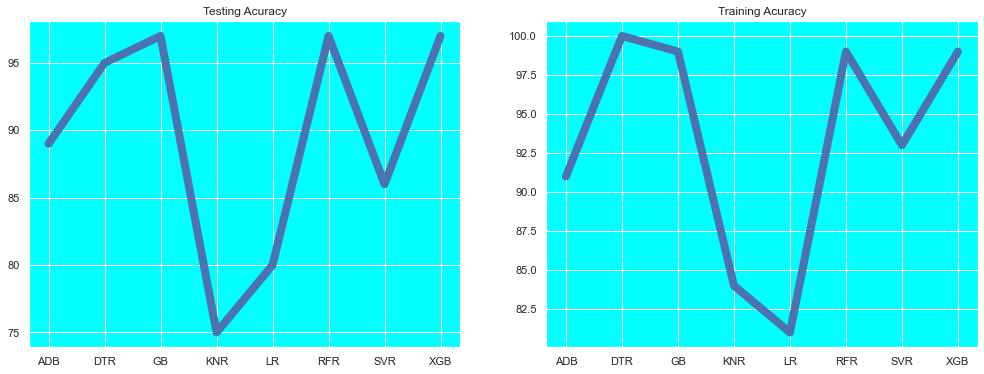

In [45]:
sns.set(rc={'axes.facecolor':'cyan', 'figure.facecolor':'w'})
fig, axes = plt.subplots(1,2,figsize=(17,6))
fig,axes[0].set_title('Testing Acuracy')
fig,axes[1].set_title('Training Acuracy')

X = ["XGB","LR","DTR","RFR","SVR","KNR","ADB","GB"]
Y = [97,80,95,97,86,75,89,97] 

B = [99,81,100,99,93,84,91,99]

sns.lineplot(x=X,y=Y,ax =axes[0],markers=True, dashes=True,palette="Set1", lw=8,markersize=10)
sns.lineplot(x=X,y=B,ax = axes[1],markers=True, dashes=True,palette="Set1", lw=8,markersize=10)


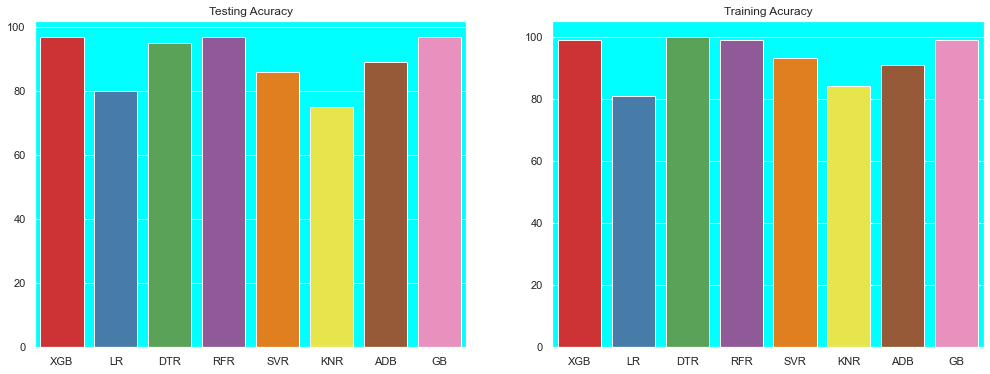

In [47]:
sns.set(rc={'axes.facecolor':'cyan', 'figure.facecolor':'w'})
fig, axes = plt.subplots(1,2,figsize=(17,6))
fig,axes[0].set_title('Testing Acuracy')
fig,axes[1].set_title('Training Acuracy')

X = ["XGB","LR","DTR","RFR","SVR","KNR","ADB","GB"]
Y = [97,80,95,97,86,75,89,97] 

B = [99,81,100,99,93,84,91,99]

sns.barplot(x=X,y=Y,ax =axes[0],palette="Set1")
sns.barplot(x=X,y=B,ax = axes[1],palette="Set1")
